In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6994,0804-YGEQV,Female,0,Yes,Yes,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.45,993.15,No
5336,9441-QHEVC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.10,19.1,No
5726,2888-ADFAO,Female,0,Yes,Yes,47,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.30,1041.8,No
431,7781-HVGMK,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),65.20,4784.45,No
643,4908-XAXAY,Female,1,No,No,49,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),89.85,4287.2,No


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

In [10]:
df = df.drop(columns=['customerID'])

In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

.corr() is a correlation function used in pandas to measure how strongly two numerical variables are related.

| Correlation Value  | Meaning                                 | Example Interpretation                        |
| ------------------ | --------------------------------------- | --------------------------------------------- |
| **0**              | No relationship                         | Tenure does NOT relate to churn at all (rare) |
| **> 0 (positive)** | Both increase together                  | Higher MonthlyCharges → Higher churn          |
| **< 0 (negative)** | One increases while the other decreases | Higher tenure → LOWER churn                   |


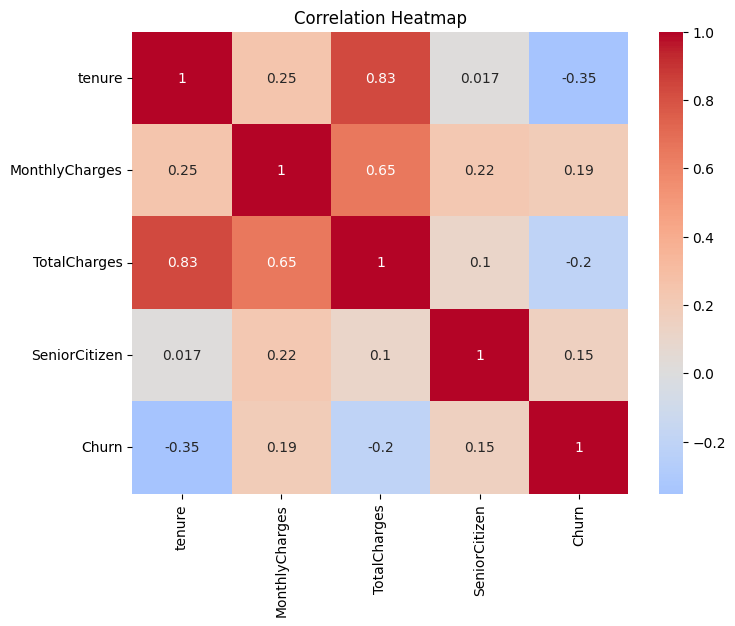

In [16]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

corr = df[num_cols + ['Churn']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

1. MonthlyCharges vs Churn: +0.19

Weak positive correlation

Means: Higher monthly bills → customers are slightly more likely to churn.

Not very strong, but still a useful signal.

2. TotalCharges vs Churn: –0.20

Weak negative correlation

Means: Customers who have paid more over time (longer-term customers) are less likely to churn.

Makes sense: long-time customers usually stay.

3. SeniorCitizen vs Churn: +0.15

Weak positive correlation

Means: Seniors churn a little more often than non-seniors.

But correlation is small → not a strong driver alone.

4. Churn vs Tenure: –0.35 (from your previous message)

Moderate negative correlation

This is the strongest relationship so far.

Means: New customers churn far more often than long-time customers.

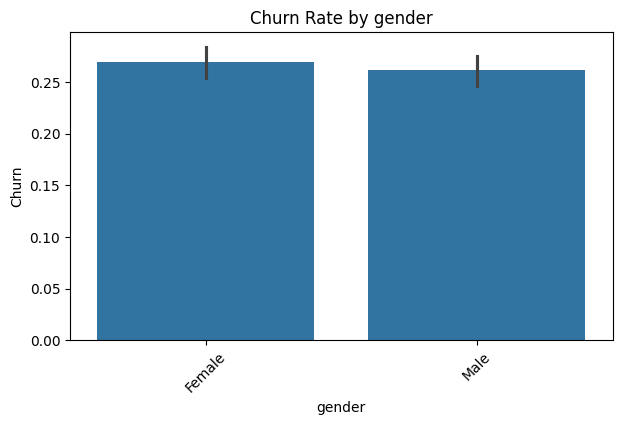

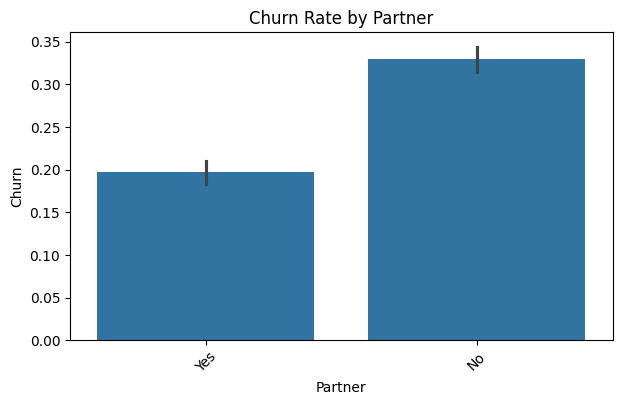

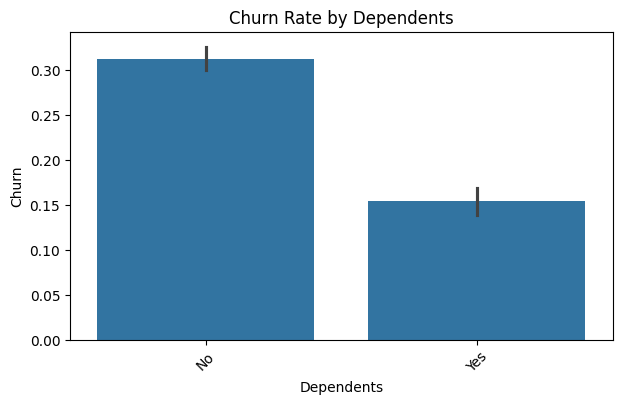

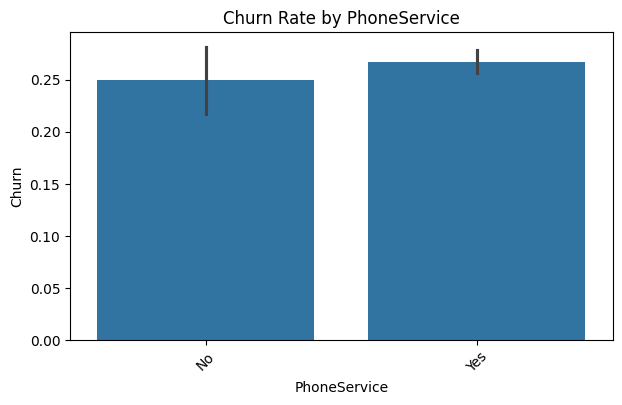

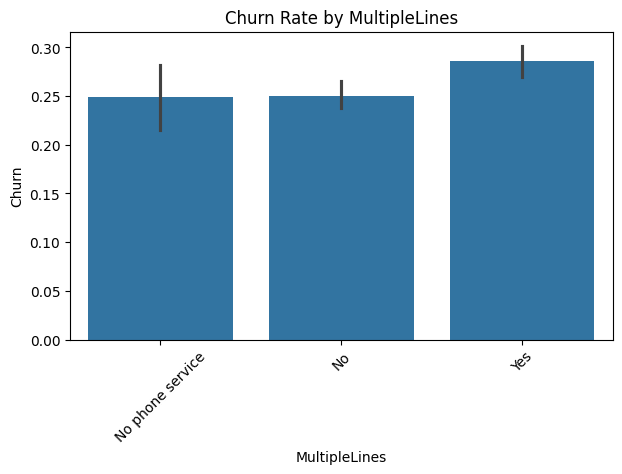

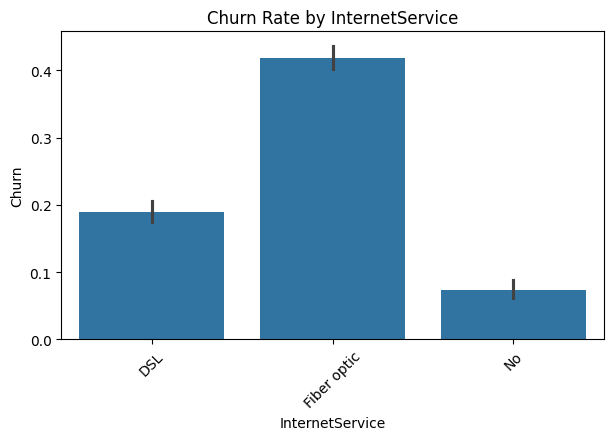

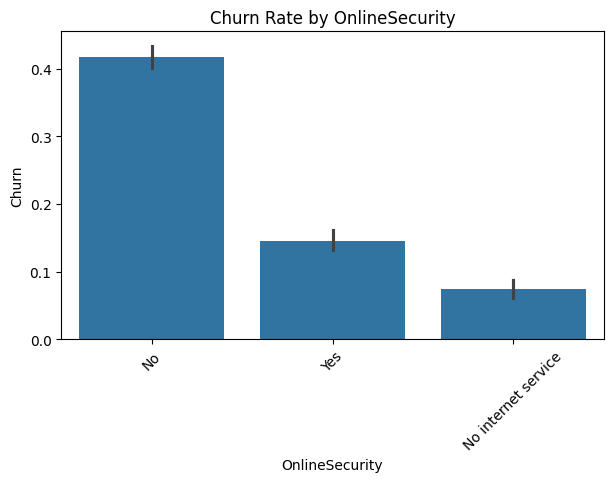

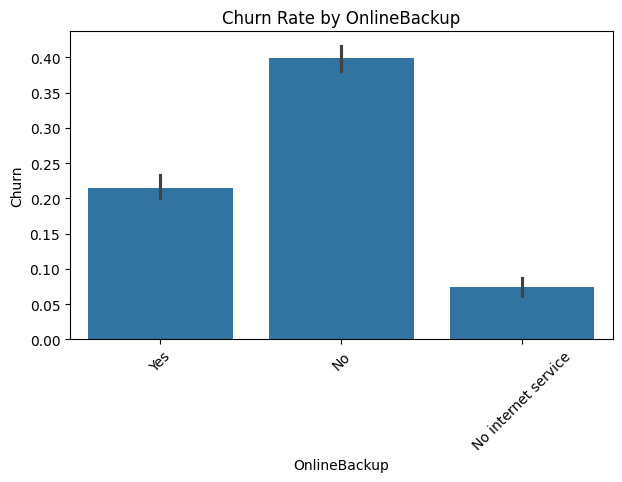

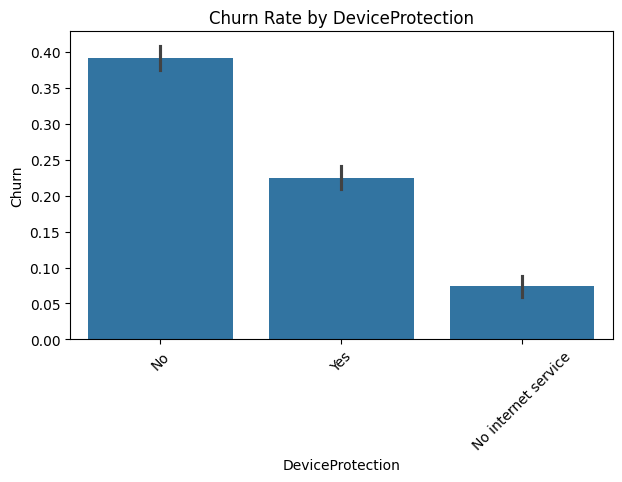

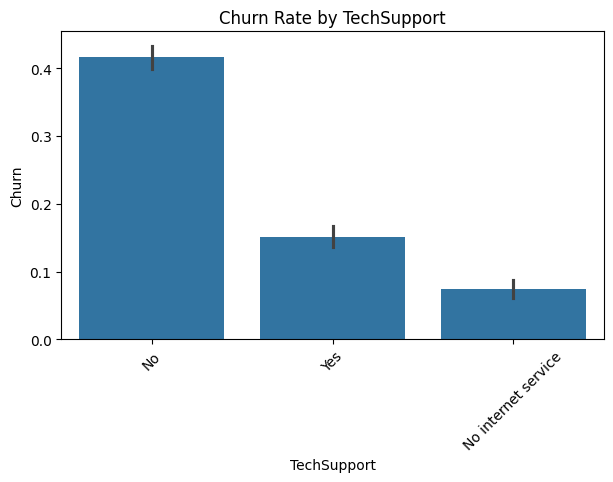

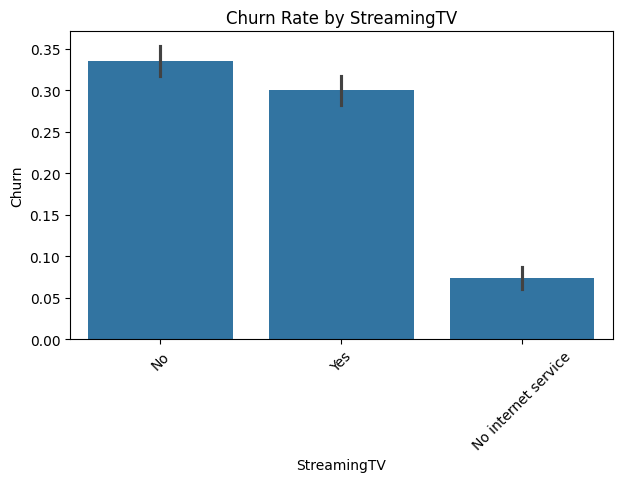

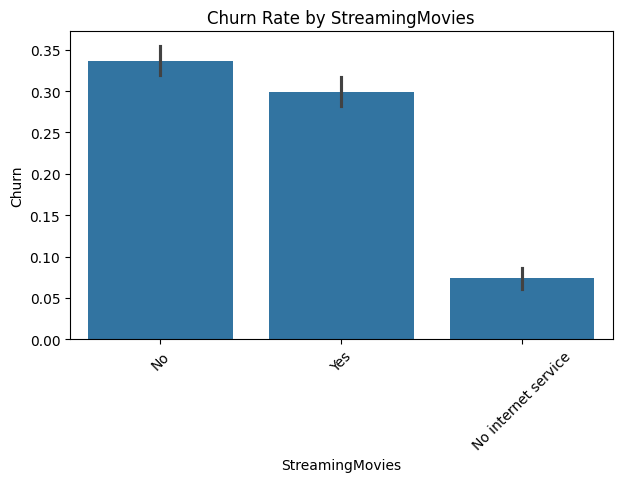

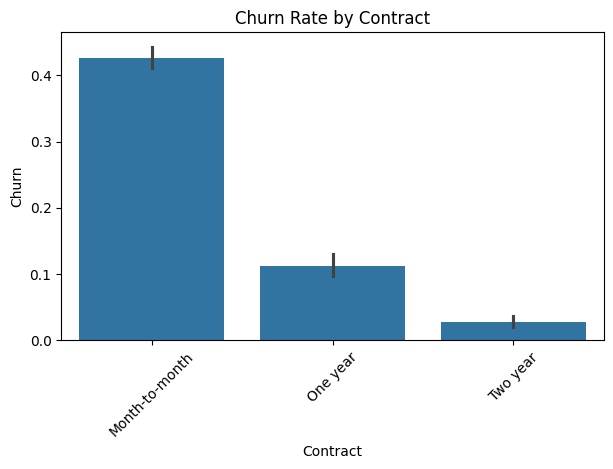

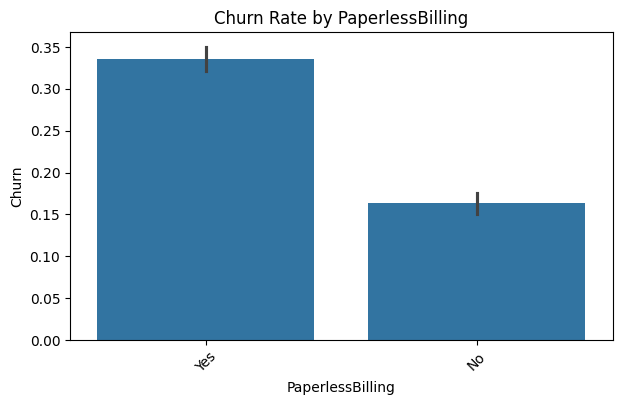

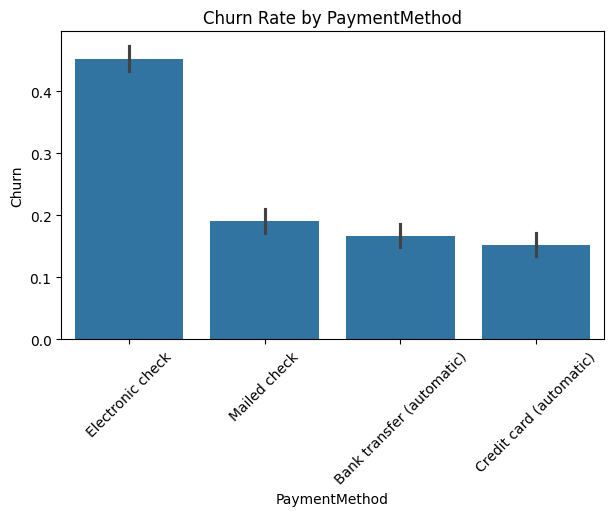

In [18]:
cat_cols = [
    'gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract',
    'PaperlessBilling','PaymentMethod'
]

for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.barplot(x=df[col], y=df['Churn'])
    plt.title(f"Churn Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()


In [34]:
df = df.drop('gender', axis = 1)

KeyError: "['gender'] not found in axis"

In [38]:
for col in df.columns:
    print(df[col].value_counts())

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No     

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   int64  
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [40]:
df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0})

In [45]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

Column: TechSupport
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

Column: StreamingTV
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

Column: StreamingMovies
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

Column: Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Column: PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check      

In [44]:
cols_with_no_internet = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_with_no_internet:
    df[col] = df[col].replace({'No internet service': 'No'})


In [46]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1, 'No':0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1, 'No':0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes':1, 'No':0})
df['TechSupport'] = df['TechSupport'].map({'Yes':1, 'No':0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1, 'No':0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1, 'No':0})

In [51]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: Contract
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Column: PaymentMethod
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [50]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0})

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=[["Month-to-month", "One year", "Two year"]]), ["Contract"]),
        ("ohe", OneHotEncoder(drop='first', sparse_output=False), ["InternetService", "PaymentMethod"])
    ],
    remainder='passthrough'
)

**we can handle the mapping of (or any binary Yes/No column) inside a pipeline as well**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [86]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [87]:
df = df.drop(columns=['customerID', 'gender'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')
# df.info()
df.isnull().sum()
df = df.dropna(subset=['TotalCharges'])


In [88]:
binary_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

ordinal_cols = ["Contract"]
ordinal_order = [["Month-to-month", "One year", "Two year"]]

ohe_cols = ["InternetService", "PaymentMethod"]

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]

target_col = "Churn"

# ---- Function to map Yes/No to 0/1 ----
def map_yes_no(X):
    X = X.copy()
    yes_no_cols = binary_cols
    for col in yes_no_cols:
        X[col] = X[col].map({'Yes':1, 'No':0})
        # Optional: replace missing or 'No internet service' with 0
        X[col] = X[col].fillna(0)
    return X

# ---- Preprocessing pipeline ----
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ("ohe", OneHotEncoder(drop='first', sparse_output=False), ohe_cols)
    ],
    remainder='passthrough'  # keep numeric and mapped binary columns
)

# ---- Full pipeline ----
pipeline = Pipeline([
    ("binary_mapper", FunctionTransformer(map_yes_no)),  # maps Yes/No → 0/1
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])

In [90]:
# ---- Split data ----
X = df.drop(target_col, axis=1)
y = df[target_col].map({'Yes':1, 'No':0})  # encode target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [91]:
# ---- Train model ----
pipeline.fit(X_train, y_train)

# ---- Predictions ----
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]


C:\Users\hp\miniconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# ---- Evaluation ----
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[915 118]
 [159 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


ROC AUC Score: 0.836683560161722


True Negatives (TN) = 915

Actual = 0 (not churn), predicted = 0

Correctly predicted non-churn customers

False Positives (FP) = 118

Actual = 0, predicted = 1

Non-churn customers predicted as churn → type I error

False Negatives (FN) = 159

Actual = 1, predicted = 0

Churn customers predicted as non-churn → type II error

Important to minimize in churn prediction

True Positives (TP) = 215

Actual = 1, predicted = 1

Correctly predicted churn customers

Precision = TP / (TP + FP)

Of all customers predicted as churn, how many actually churn?

Class 1 (churn) → 0.65 → 65% of predicted churns are correct

Recall (Sensitivity / True Positive Rate) = TP / (TP + FN)

Of all actual churn customers, how many did we correctly identify?

Class 1 → 0.57 → 57% of actual churn customers are caught

Important for business: you want high recall for churn, so you don’t miss many churners

F1-Score = harmonic mean of precision and recall

Balances precision and recall

Class 1 → 0.61 → moderate performance

Support = number of actual samples in that class

Class 0 → 1033 non-churn

Class 1 → 374 churn

80% of all predictions (both churn and non-churn) are correct

But note: dataset is imbalanced (more non-churn than churn) → accuracy can be misleading

ROC curve plots True Positive Rate vs False Positive Rate

AUC = area under ROC curve → measures overall model’s ability to distinguish classes

Interpretation:

0.5 → random guessing

0.6–0.7 → poor

0.7–0.8 → acceptable

0.8–0.9 → good

0.9+ → excellent

0.837 → good, your model is reasonably able to distinguish churners from non-churners.

Business Interpretation

Your model predicts non-churn very well (TN=915, recall 0.89).

Churn prediction is weaker (TP=215, recall 0.57) → you’re missing 43% of actual churners.

Precision for churn is 0.65 → some customers predicted as churn actually do not churn.

Overall ROC AUC 0.837 → decent separation ability.

Actionable insight:

You might want to tune the decision threshold to increase recall for churners, even if it slightly reduces precision.

This is important in business: it’s better to flag more possible churners than miss them.

C:\Users\hp\miniconda3\envs\my_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


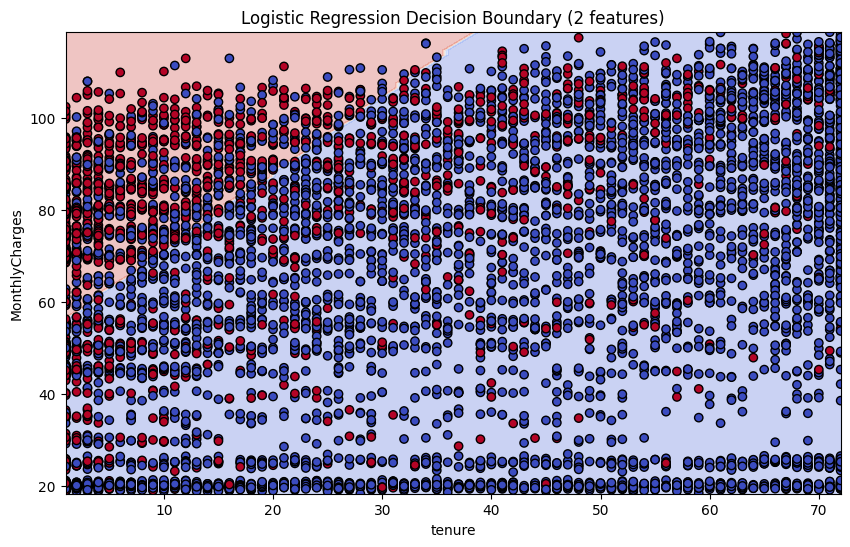

In [96]:
features = ['tenure', 'MonthlyCharges']
X_vis = df[features]
y_vis = df['Churn'].map({'Yes':1, 'No':0})

model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Create a meshgrid
x_min, x_max = X_vis['tenure'].min(), X_vis['tenure'].max()
y_min, y_max = X_vis['MonthlyCharges'].min(), X_vis['MonthlyCharges'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict on the grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis['tenure'], X_vis['MonthlyCharges'], c=y_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.title('Logistic Regression Decision Boundary (2 features)')
plt.show()


**Need to improve performance of the model**

*Option A — Use class weights*
<br>Automatically gives more weight to minority class (churn)
<br>Increases recall for churners

In [98]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = df.drop(columns=['customerID', 'gender'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')
# df.info()
df.isnull().sum()
df = df.dropna(subset=['TotalCharges'])

binary_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

ordinal_cols = ["Contract"]
ordinal_order = [["Month-to-month", "One year", "Two year"]]

ohe_cols = ["InternetService", "PaymentMethod"]

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]

target_col = "Churn"

# ---- Function to map Yes/No to 0/1 ----
def map_yes_no(X):
    X = X.copy()
    yes_no_cols = binary_cols
    for col in yes_no_cols:
        X[col] = X[col].map({'Yes':1, 'No':0})
        # Optional: replace missing or 'No internet service' with 0
        X[col] = X[col].fillna(0)
    return X

# ---- Preprocessing pipeline ----
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ("ohe", OneHotEncoder(drop='first', sparse_output=False), ohe_cols)
    ],
    remainder='passthrough'  # keep numeric and mapped binary columns
)

# ---- Full pipeline ----
pipeline = Pipeline([
    ("binary_mapper", FunctionTransformer(map_yes_no)),  # maps Yes/No → 0/1
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(class_weight='balanced', max_iter=500))
])

# ---- Split data ----
X = df.drop(target_col, axis=1)
y = df[target_col].map({'Yes':1, 'No':0})  # encode target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Train model ----
pipeline.fit(X_train, y_train)

# ---- Predictions ----
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

# ---- Evaluation ----
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[722 311]
 [ 76 298]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407


ROC AUC Score: 0.8359924626367312


C:\Users\hp\miniconda3\envs\my_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Option II - Feature Engineering*

In [102]:
from sklearn.preprocessing import StandardScaler

# ---- Load data ----
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# ---- Drop unneeded columns ----
df = df.drop(columns=['customerID', 'gender'])

# ---- Convert TotalCharges to numeric ----
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# ---- Column definitions ----
binary_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

ordinal_cols = ["Contract"]
ordinal_order = [["Month-to-month", "One year", "Two year"]]

ohe_cols = ["InternetService", "PaymentMethod", "Contract_Internet", "tenure_bin"]  # Add engineered categorical features

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen", "AvgMonthlyCharge"]

target_col = "Churn"

# ---- Function to map Yes/No to 0/1 ----
def map_yes_no(X):
    X = X.copy()
    for col in binary_cols:
        X[col] = X[col].map({'Yes':1, 'No':0})
        X[col] = X[col].fillna(0)
    return X

# ---- Feature engineering ----
def add_features(X):
    X = X.copy()
    # Avg monthly charge
    X['AvgMonthlyCharge'] = X.apply(lambda row: row['TotalCharges']/row['tenure'] if row['tenure']>0 else 0, axis=1)
    # Interaction
    X['Contract_Internet'] = X['Contract'] + '_' + X['InternetService']
    # Bin tenure
    bins = [0,12,48,72]
    labels = ['Short','Medium','Long']
    X['tenure_bin'] = pd.cut(X['tenure'], bins=bins, labels=labels)
    return X

# ---- Preprocessing ----
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ("ohe", OneHotEncoder(drop='first', sparse_output=False), ohe_cols),
        ("num", StandardScaler(), numeric_cols)  # Scale numeric features
    ],
    remainder='passthrough'
)

# ---- Full pipeline ----
pipeline = Pipeline([
    ('feature_engineering', FunctionTransformer(add_features)),
    ('binary_mapper', FunctionTransformer(map_yes_no)),
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=500))
])

# ---- Split data ----
X = df.drop(target_col, axis=1)
y = df[target_col].map({'Yes':1, 'No':0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Train model ----
pipeline.fit(X_train, y_train)

# ---- Predictions ----
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

# ---- Evaluation ----
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[720 313]
 [ 75 299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407


ROC AUC Score: 0.8338803443581075


*Option III - Hyperparameter Tuning*

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'classifier__penalty': ['l1', 'l2'],       # type of regularization
    'classifier__solver': ['liblinear', 'saga']  # solver compatible with penalties
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',       # optimize for ROC AUC
    cv=5,                    # 5-fold cross-validation
    n_jobs=-1,               # use all cores
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best ROC AUC: 0.8469830832395313
Confusion Matrix:
[[722 311]
 [ 75 299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407


ROC AUC Score: 0.8342815432958363


*Option IV - Feature Scaling*

In [118]:
# ---- Load data ----
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# ---- Drop unnecessary columns ----
df = df.drop(columns=['customerID', 'gender'])

# ---- Convert TotalCharges to numeric ----
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# ---- Column definitions ----
binary_cols = [
    "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

ordinal_cols = ["Contract"]
ordinal_order = [["Month-to-month", "One year", "Two year"]]

ohe_cols = ["InternetService", "PaymentMethod", "Contract_Internet", "tenure_bin"]

numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen", "AvgMonthlyCharge"]

target_col = "Churn"

# ---- Function to map Yes/No to 0/1 ----
def map_yes_no(X):
    X = X.copy()
    for col in binary_cols:
        X[col] = X[col].map({'Yes':1, 'No':0})
        X[col] = X[col].fillna(0)
    return X

# # ---- Feature engineering ----
# def add_features(X):
#     X = X.copy()
#     # Avg monthly charge
#     X['AvgMonthlyCharge'] = X.apply(lambda row: row['TotalCharges']/row['tenure'] if row['tenure']>0 else 0, axis=1)
#     # Interaction term
#     X['Contract_Internet'] = X['Contract'] + '_' + X['InternetService']
#     # Bin tenure
#     bins = [0,12,48,72]
#     labels = ['Short','Medium','Long']
#     X['tenure_bin'] = pd.cut(X['tenure'], bins=bins, labels=labels)
#     return X

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # nothing to fit

    def transform(self, X):
        X = X.copy()
        # Average monthly charge
        X['AvgMonthlyCharge'] = X.apply(lambda row: row['TotalCharges']/row['tenure'] if row['tenure']>0 else 0, axis=1)
        # Interaction term
        X['Contract_Internet'] = X['Contract'] + '_' + X['InternetService']
        # Tenure bin
        bins = [0,12,48,72]
        labels = ['Short','Medium','Long']
        X['tenure_bin'] = pd.cut(X['tenure'], bins=bins, labels=labels)
        return X


# ---- Preprocessing ----
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ("ohe", OneHotEncoder(drop='first', sparse_output=False), ohe_cols),
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'
)

# ---- Logistic Regression with best parameters ----
classifier = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    max_iter=500
)

# ---- Full pipeline ----
pipeline = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('binary_mapper', FunctionTransformer(map_yes_no)),
    ('preprocessing', preprocessor),
    ('classifier', classifier)
])

# ---- Split data ----
X = df.drop(target_col, axis=1)
y = df[target_col].map({'Yes':1, 'No':0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Train model ----
pipeline.fit(X_train, y_train)

# ---- Predictions ----
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

# ---- Evaluation ----
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[722 311]
 [ 75 299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407


ROC AUC Score: 0.8342841316760797


In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Using ROC AUC as scoring
scores = cross_val_score(
    pipeline,
    X, y,
    cv=5,  # 5-fold CV
    scoring='roc_auc',  # Can also use 'accuracy', 'f1', 'recall'
    n_jobs=-1
)

print("ROC AUC scores for each fold:", scores)
print("Mean ROC AUC:", scores.mean())
print("Std deviation:", scores.std())


ROC AUC scores for each fold: [0.86077232 0.85495235 0.83286531 0.83831173 0.84035982]
Mean ROC AUC: 0.8454523054831556
Std deviation: 0.010585909346353149


In [120]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'churn_model.pkl')


['churn_model.pkl']

In [121]:
# # export 
# import pickle
# pickle.dump(pipeline, open('churn_model.pkl','wb'))